In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, balanced_accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

import random
import time

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import plot_tree


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cardio_train.csv', delimiter = ";")

In [4]:
######데이터 전처리######3

In [5]:
df = df.drop(['id'], axis=1)

In [6]:
df['cardio'].replace({0:1,1:0},inplace=True)

In [7]:
# 결측치 확인
df.isnull().sum().sort_values(ascending=False)

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
#Age 변수 조정 ~ 일수로 저장되어있기에 365로 나눠줌
df['age'] = df['age'] / 365
df['age'] = df['age'].astype(int)

In [9]:
#Q1-4.데이터 Split 기준
#기존 cardio는 50.03 %임, cardio가 0

df_split = df.copy()
X = df_split.drop(columns=['cardio'], axis=1)
y = df_split['cardio']
train_100 = round((y == 1).mean() * 100, 3)
print(train_100)

50.03


In [10]:
# Stratify를 사용해야하는 이유

sum = 0
for i in range(1,30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)#, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i)#, stratify=y_test)
  temp = (y_validation == 1).mean() * 100
  sum += temp

train_80 = round(sum / 30, 3)
train_80

48.31

In [11]:
# 8: 1: 1

sum = 0
for i in range(1,30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i, stratify=y_test)
  temp = (y_validation == 1).mean() * 100
  sum += temp

train_80 = round(sum / 30, 3)
train_80

48.361

In [12]:
# 7: 1.5: 1.5

sum = 0
for i in range(1,30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i, stratify=y_test)
  temp = (y_validation == 1).mean() * 100
  sum += temp

train_70 = round(sum / 30, 3)
train_70

48.361

In [13]:
# 6: 2: 2

sum = 0
for i in range(1,30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i, stratify=y_test)
  temp = (y_validation == 1).mean() * 100
  sum += temp

train_60 = round(sum / 30, 3)
train_60

48.361

In [14]:
#Q2.

In [15]:
## Full Tree 학습

In [16]:
df_tree = df.copy()
X = df_tree.drop(columns=['cardio'], axis=1)
y = df_tree['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Create the decision tree classifier object with default parameters
FullTree = DecisionTreeClassifier()

# Fit the decision tree classifier to the training data
FullTree.fit(X_train, y_train)

y_pred = FullTree.predict(X_test)
acc_after_pruning = FullTree.score(X_test, y_test)

In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

y_train_pred = FullTree.predict(X_train)
y_test_pred = FullTree.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_train = tp_train / (tp_train + fn_train)
tnr_train = tn_train / (tn_train + fp_train)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_train = (tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)

bcr_train = (tpr_train + tnr_train) / 2
bcr_test = (tpr_test + tnr_test) / 2

f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

auroc_train = roc_auc_score(y_train, y_train_pred)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Training Data:")
print("Accuracy:", round(accuracy_train, 3))
print("BCR (Balanced Accuracy):", round(bcr_train, 3))
print("AUROC:", round(auroc_train, 3))
print("F1 Score:", round(f1_train, 3))
print("Precision:", round(precision_train, 3))
print("Recall (Sensitivity):", round(recall_train, 3))
print("TPR (Sensitivity):", round(tpr_train, 3))
print("TNR (Specificity):", round(tnr_train, 3))
print()

print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

Training Data:
Accuracy: 0.984
BCR (Balanced Accuracy): 0.984
AUROC: 0.984
F1 Score: 0.984
Precision: 0.992
Recall (Sensitivity): 0.975
TPR (Sensitivity): 0.975
TNR (Specificity): 0.992

Test Data:
Accuracy: 0.637
BCR (Balanced Accuracy): 0.637
AUROC: 0.637
F1 Score: 0.634
Precision: 0.64
Recall (Sensitivity): 0.629
TPR (Sensitivity): 0.629
TNR (Specificity): 0.645


In [19]:
path = FullTree.cost_complexity_pruning_path(X_val, y_val)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

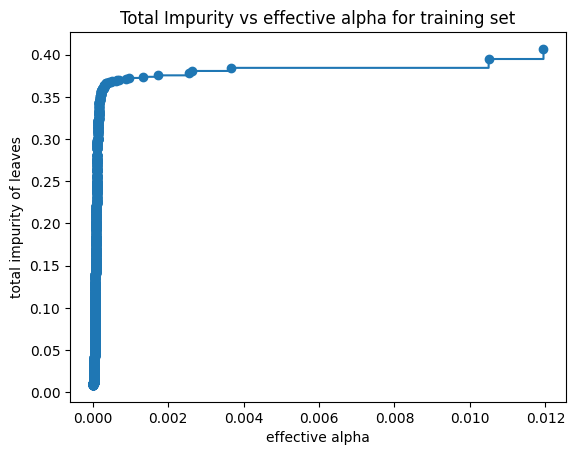

In [20]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [21]:
# Sample로 실험 진행
df_sample = df[:3500].copy()
X = df_sample.drop(columns=['cardio'], axis=1)
y = df_sample['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [22]:
clfs = []
for ccp_alpha in ccp_alphas:
    FullTree_post = DecisionTreeClassifier(random_state=2023, ccp_alpha=ccp_alpha)
    FullTree_post.fit(X_train, y_train)
    clfs.append(FullTree_post)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.09313140567037032


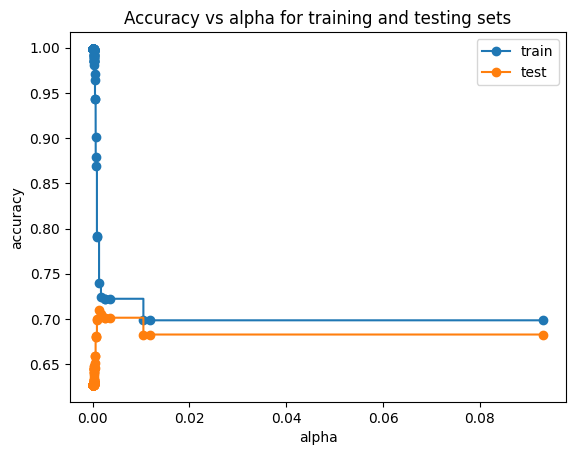

In [23]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

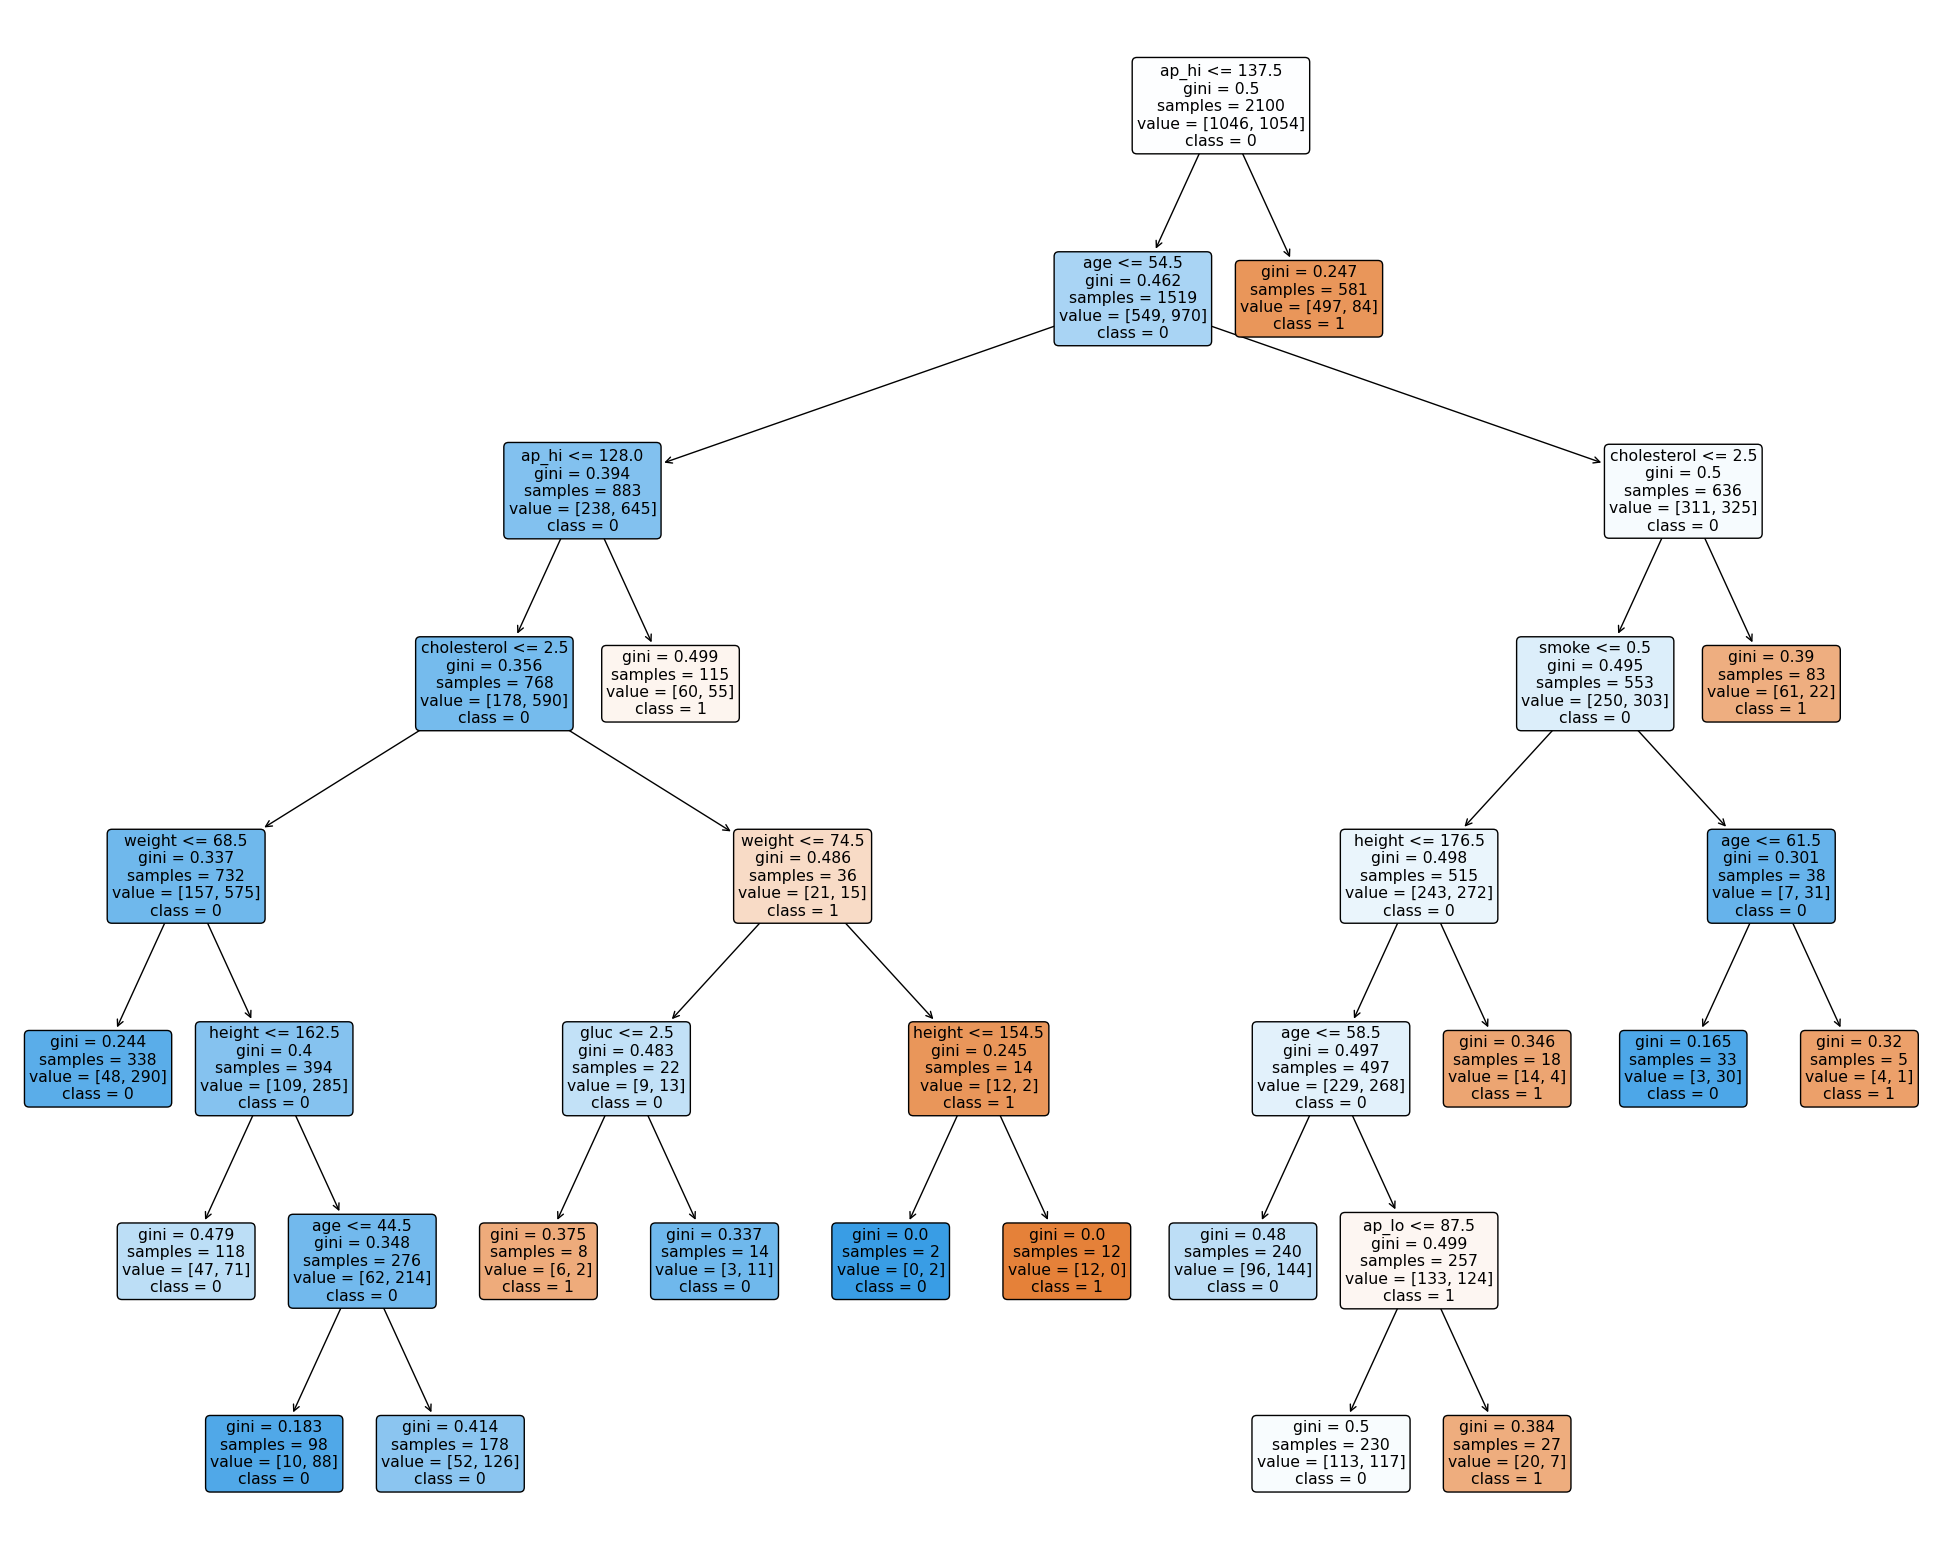

In [24]:
best_clf = clfs[np.argmax(test_scores)]
fig = plt.figure(figsize=(25,20))
_ = plot_tree(best_clf,
              feature_names=X_train.columns.values,
              class_names=list(map(str, y_train.unique())),
              rounded=True,
              filled=True)

In [25]:
df_tree = df.copy()
X = df_tree.drop(columns=['cardio'], axis=1)
y = df_tree['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [26]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

y_test_pred = best_clf.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))


Test Data:
Accuracy: 0.715
BCR (Balanced Accuracy): 0.715
AUROC: 0.715
F1 Score: 0.738
Precision: 0.683
Recall (Sensitivity): 0.803
TPR (Sensitivity): 0.803
TNR (Specificity): 0.628


In [27]:
#Q3.

In [28]:
## Full Tree 그림을 활용해 규칙 찾기

In [29]:
df_sample = df[:3500].copy()
X = df_sample.drop(columns=['cardio'], axis=1)
y = df_sample['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Create the decision tree classifier object with default parameters
FullTree = DecisionTreeClassifier()

# Fit the decision tree classifier to the training data
FullTree.fit(X_train, y_train)

y_pred = FullTree.predict(X_test)
acc_after_pruning = FullTree.score(X_test, y_test)

In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

y_train_pred = FullTree.predict(X_train)
y_test_pred = FullTree.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_train = tp_train / (tp_train + fn_train)
tnr_train = tn_train / (tn_train + fp_train)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_train = (tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)

bcr_train = (tpr_train + tnr_train) / 2
bcr_test = (tpr_test + tnr_test) / 2

f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

auroc_train = roc_auc_score(y_train, y_train_pred)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Training Data:")
print("Accuracy:", round(accuracy_train, 3))
print("BCR (Balanced Accuracy):", round(bcr_train, 3))
print("AUROC:", round(auroc_train, 3))
print("F1 Score:", round(f1_train, 3))
print("Precision:", round(precision_train, 3))
print("Recall (Sensitivity):", round(recall_train, 3))
print("TPR (Sensitivity):", round(tpr_train, 3))
print("TNR (Specificity):", round(tnr_train, 3))
print()

print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

Training Data:
Accuracy: 0.999
BCR (Balanced Accuracy): 0.999
AUROC: 0.999
F1 Score: 0.999
Precision: 1.0
Recall (Sensitivity): 0.997
TPR (Sensitivity): 0.997
TNR (Specificity): 1.0

Test Data:
Accuracy: 0.626
BCR (Balanced Accuracy): 0.626
AUROC: 0.626
F1 Score: 0.633
Precision: 0.623
Recall (Sensitivity): 0.644
TPR (Sensitivity): 0.644
TNR (Specificity): 0.607


In [32]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

y_test_pred = FullTree_post.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))


Test Data:
Accuracy: 0.683
BCR (Balanced Accuracy): 0.682
AUROC: 0.682
F1 Score: 0.749
Precision: 0.621
Recall (Sensitivity): 0.946
TPR (Sensitivity): 0.946
TNR (Specificity): 0.418


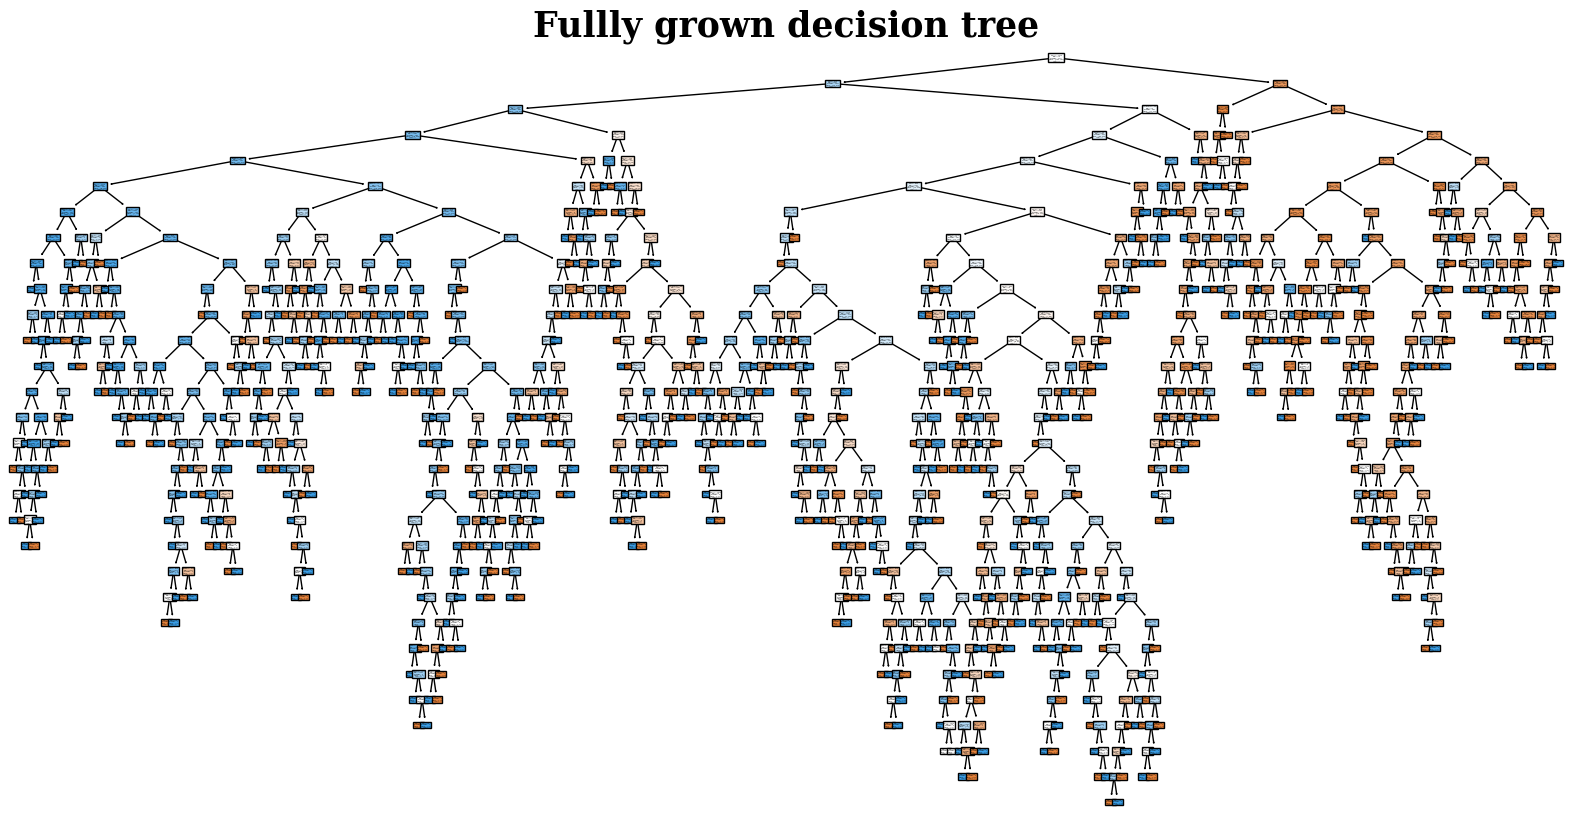

In [33]:
feature_names = df_sample.columns.tolist()
target_names = df_sample['cardio'].unique().tolist()
target_names = [str(class_name) for class_name in target_names]

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(FullTree, filled=True, feature_names=feature_names, class_names=target_names, ax=ax)
plt.title('Fullly grown decision tree', fontdict={'fontsize': 25, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.show()

In [34]:
## Pre pruning 하이퍼파라미터 튜닝

In [35]:
df_tree = df.copy()
X = df_tree.drop(columns=['cardio'], axis=1)
y = df_tree['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [36]:
import copy

# set the hyperparameters for pre-pruning
param_grid = {'criterion' : ["gini", "entropy", "log_loss"],
              'max_depth': [10, 20, 30, None],
              'min_samples_split': [40, 60, 100, None],
              'min_samples_leaf': [35, 40, 50, None],
              'max_leaf_nodes': [450, 500, 549]}


FullTree_pre = copy.deepcopy(FullTree)

# perform grid search to find the best hyperparameters based on AUROC for validation data
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(FullTree_pre, param_grid, scoring='roc_auc', cv=5,  refit=True)
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters for pre-pruning:", best_params)

# create a new DecisionTreeClassifier object with the best hyperparameters
FullTree_pre = DecisionTreeClassifier(**best_params)

# train the decision tree on the learning data
FullTree_pre.fit(X_train, y_train)

# Evaluate the decision tree on the verification data
y_val_pred = FullTree_pre.predict(X_val)
auroc = roc_auc_score(y_val, y_val_pred)


# extract hyperparameters and results
results = pd.DataFrame.from_dict(grid_search.cv_results_)
cols_to_keep = ['params', 'mean_test_score']
results = results[cols_to_keep]
results['params'] = results['params'].apply(lambda x: str(x).replace('{', '').replace('}', ''))
results['mean_test_score'] = results['mean_test_score'].round(3)

# print results in a table format
#print('\nResults:')
#print(results.to_string(index=False))

Best hyperparameters for pre-pruning: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 549, 'min_samples_leaf': 50, 'min_samples_split': 40}


In [37]:
results

,params,mean_test_score
0,"'criterion': 'gini', 'max_depth': 10, 'max_lea...",0.792
1,"'criterion': 'gini', 'max_depth': 10, 'max_lea...",0.792
2,"'criterion': 'gini', 'max_depth': 10, 'max_lea...",0.793
3,"'criterion': 'gini', 'max_depth': 10, 'max_lea...",NaN
4,"'criterion': 'gini', 'max_depth': 10, 'max_lea...",0.793
...,...,...
571,"'criterion': 'log_loss', 'max_depth': None, 'm...",NaN
572,"'criterion': 'log_loss', 'max_depth': None, 'm...",NaN
573,"'criterion': 'log_loss', 'max_depth': None, 'm...",NaN
574,"'criterion': 'log_loss', 'max_depth': None, 'm...",NaN


In [38]:
# Calculate maximum, minimum, and average AUROC values
max_auroc = results['mean_test_score'].max()
min_auroc = results['mean_test_score'].min()
avg_auroc = results['mean_test_score'].mean()

print("Maximum AUROC:", max_auroc)
print("Minimum AUROC:", min_auroc)
print("Average AUROC:", avg_auroc)

Maximum AUROC: 0.794
Minimum AUROC: 0.784
Average AUROC: 0.7880895061728396


In [39]:
param_grid = {'criterion': 'log_loss', 'max_depth': [10], 'max_leaf_nodes': [450], 'min_samples_leaf': [50], 'min_samples_split': [100]}

# create a new DecisionTreeClassifier object with the hyperparameters from param_grid
FullTree_pre = DecisionTreeClassifier(max_depth=10,
                                      max_leaf_nodes=450,
                                      min_samples_leaf=50,
                                      min_samples_split=100)

# train the decision tree on the learning data
# Train the final model on the combined training and validation data
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

FullTree_pre.fit(X_train_val, y_train_val)

# Evaluate the decision tree on the test data
y_test_pred = FullTree_pre.predict(X_test)
auroc = roc_auc_score(y_test, y_test_pred)
print("AUROC on test data:", auroc)

AUROC on test data: 0.7292692993532407


In [40]:
y_test_pred = FullTree_pre.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

Test Data:
Accuracy: 0.729
BCR (Balanced Accuracy): 0.729
AUROC: 0.729
F1 Score: 0.737
Precision: 0.717
Recall (Sensitivity): 0.758
TPR (Sensitivity): 0.758
TNR (Specificity): 0.701


In [41]:
#Q4.

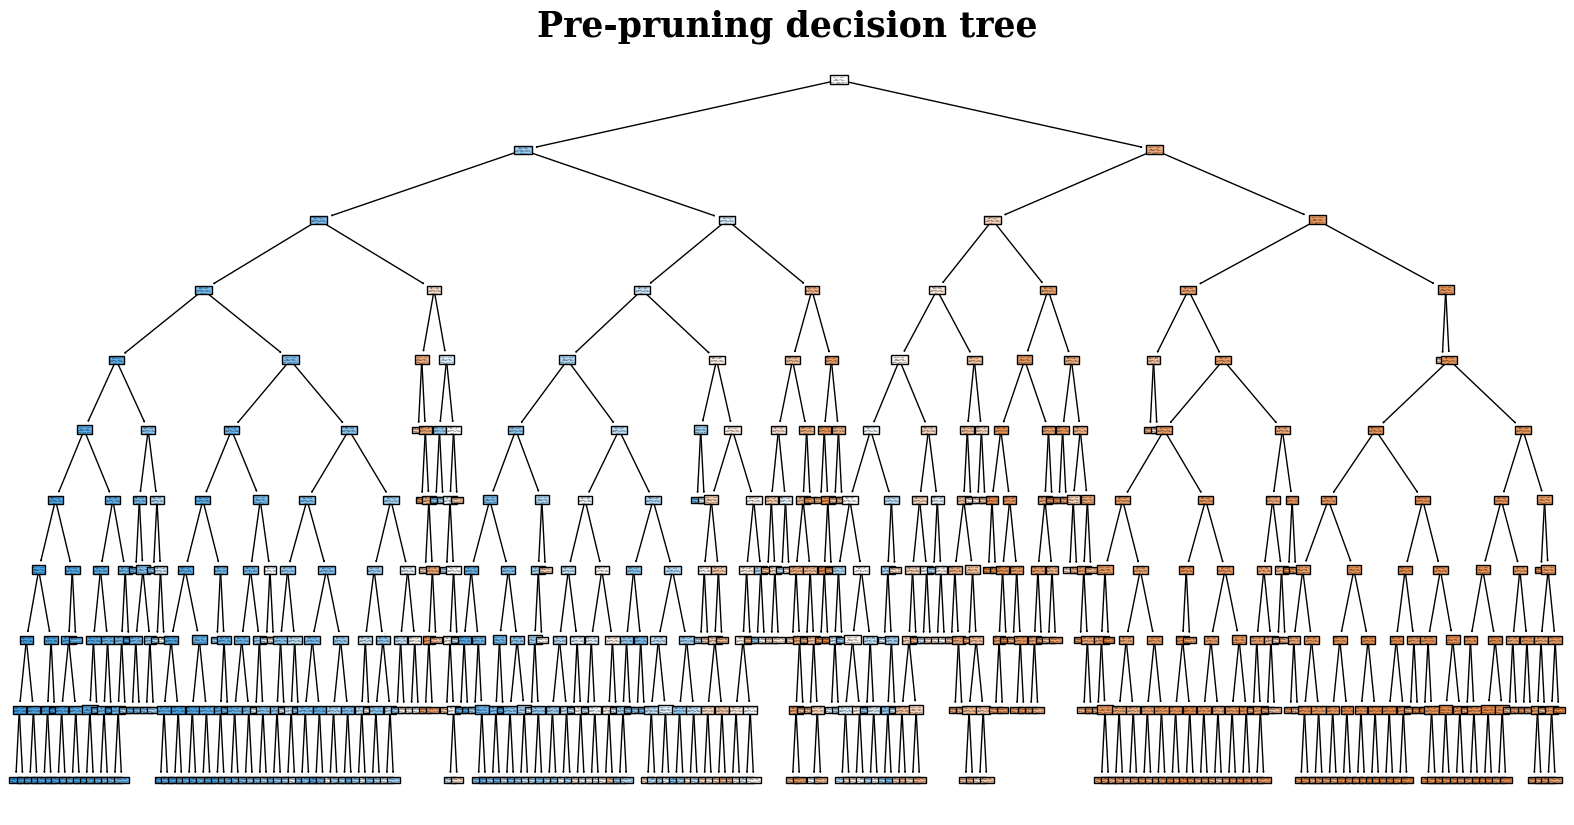

In [42]:
feature_names = df_tree.columns.tolist()
target_names = df_tree['cardio'].unique().tolist()
target_names = [str(class_name) for class_name in target_names]

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(FullTree_pre, filled=True, feature_names=feature_names, class_names=target_names, ax=ax)
plt.title('Pre-pruning decision tree', fontdict={'fontsize': 25, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.show()

In [43]:
importance = FullTree_pre.feature_importances_
variable_counts = dict(zip(feature_names, importance))

print("Variable Importance:")
for variable, count in variable_counts.items():
    print(variable, ":", count)

Variable Importance:
age : 0.12612852042530465
gender : 0.003200605823761715
height : 0.012794243389888276
weight : 0.027779233491871953
ap_hi : 0.7270443940443112
ap_lo : 0.011588175549301584
cholesterol : 0.07376621501998154
gluc : 0.007343119470166813
smoke : 0.0032611580451457024
alco : 0.0002796305531938787
active : 0.006814704187072557


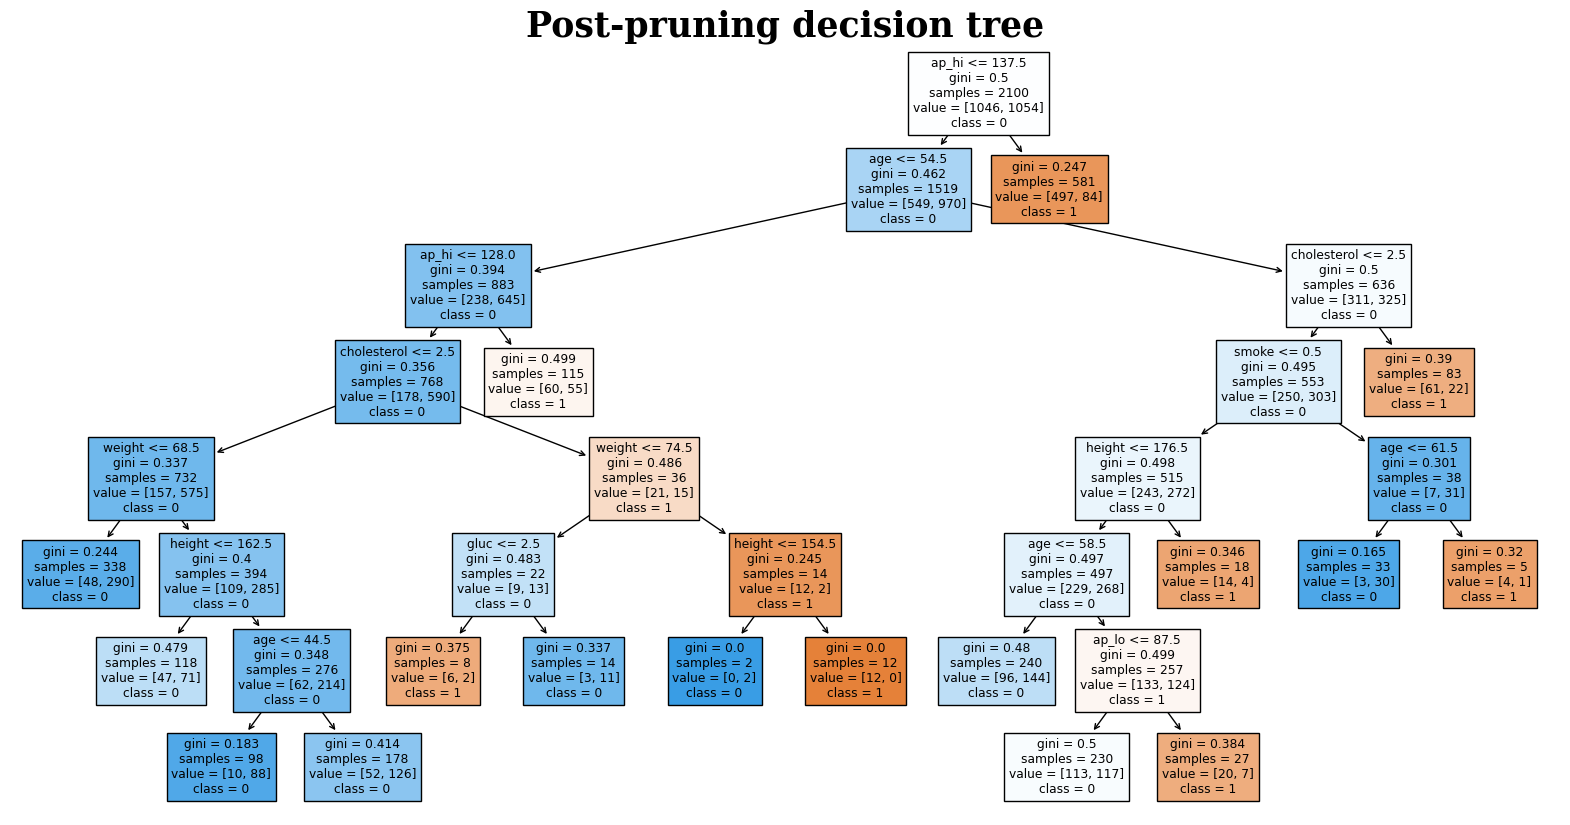

In [44]:
feature_names = df_tree.columns.tolist()
target_names = df_tree['cardio'].unique().tolist()
target_names = [str(class_name) for class_name in target_names]

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=feature_names, class_names=target_names, ax=ax)
plt.title('Post-pruning decision tree', fontdict={'fontsize': 25, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.show()

In [45]:
importance = best_clf.feature_importances_
variable_counts = dict(zip(feature_names, importance))

print("Variable Importance:")
for variable, count in variable_counts.items():
    print(variable, ":", count)

Variable Importance:
age : 0.1478309628481093
gender : 0.0
height : 0.03668896985994272
weight : 0.030910258748659762
ap_hi : 0.6838981372166723
ap_lo : 0.009265587500803316
cholesterol : 0.06435728896494347
gluc : 0.009004438723694084
smoke : 0.018044356137175054
alco : 0.0
active : 0.0


In [46]:
#Q6.

In [47]:
##k-fold로 hidden node 범위 조정

In [48]:
df_nn = df.copy()
X = df_nn.drop(columns=['cardio'], axis=1)
y = df_nn['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [49]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, confusion_matrix

# Candidate hidden nodes
hidden = np.arange(5, 101, 5)

# 5-fold cross validation index
kf = KFold(n_splits=5)
val_perf = pd.DataFrame(columns=['hidden', 'ACC', 'BCR', 'AUROC'])

for hidden_nodes in hidden:
    print(f"Training ANN: the number of hidden nodes: {hidden_nodes}")
    eval_fold = []

    for train_index, val_index in kf.split(X_train):
        # Training with the data in (k-1) folds
        tmp_trn_input = X_train.iloc[train_index]
        tmp_trn_target = y_train.iloc[train_index]
        tmp_net = MLPClassifier(hidden_layer_sizes=(hidden_nodes,), max_iter=400, verbose=False)
        tmp_net.fit(tmp_trn_input, tmp_trn_target)

        # Evaluate the model with the remaining 1 fold
        tmp_val_input = X_train.iloc[val_index]
        tmp_val_target = y_train.iloc[val_index]

        eval_fold.append(confusion_matrix(tmp_val_target, tmp_net.predict(tmp_val_input)))

    # Confusion matrix
    cm = np.mean(eval_fold, axis=0).astype(float)

    # Simple Accuracy
    ACC = np.trace(cm) / np.sum(cm)

    # Balanced Correction Rate
    BCR = np.power(np.prod(np.diag(cm) / np.sum(cm, axis=1)), 1 / cm.shape[0])

    eval_labels = np.concatenate([y_train.iloc[val_index] for _, val_index in kf.split(X_train)])
    eval_probs = np.concatenate([tmp_net.predict_proba(X_train.iloc[val_index])[:, 1] for _, val_index in kf.split(X_train)])
    AUROC = roc_auc_score(eval_labels, eval_probs)

    # Append the values to the DataFrame
    val_perf = pd.concat([val_perf, pd.DataFrame({'hidden': [hidden_nodes], 'ACC': [ACC], 'BCR': [BCR], 'AUROC': [AUROC]})], ignore_index=True)

# Sort based on AUROC in descending order
ordered_kfold = val_perf.sort_values(by='AUROC', ascending=False)

print(ordered_kfold)


Training ANN: the number of hidden nodes: 5
Training ANN: the number of hidden nodes: 10
Training ANN: the number of hidden nodes: 15
Training ANN: the number of hidden nodes: 20
Training ANN: the number of hidden nodes: 25
Training ANN: the number of hidden nodes: 30
Training ANN: the number of hidden nodes: 35
Training ANN: the number of hidden nodes: 40
Training ANN: the number of hidden nodes: 45
Training ANN: the number of hidden nodes: 50
Training ANN: the number of hidden nodes: 55
Training ANN: the number of hidden nodes: 60
Training ANN: the number of hidden nodes: 65
Training ANN: the number of hidden nodes: 70
Training ANN: the number of hidden nodes: 75
Training ANN: the number of hidden nodes: 80
Training ANN: the number of hidden nodes: 85
Training ANN: the number of hidden nodes: 90
Training ANN: the number of hidden nodes: 95
Training ANN: the number of hidden nodes: 100
   hidden       ACC       BCR     AUROC
12     65  0.706405  0.706093  0.787328
9      50  0.715333 

In [52]:
ordered_kfold

,hidden,ACC,BCR,AUROC
12,65,0.706405,0.706093,0.787328
9,50,0.715333,0.712724,0.786203
16,85,0.708405,0.705659,0.785067
5,30,0.714786,0.712594,0.784646
18,95,0.699381,0.699083,0.784581
0,5,0.715429,0.715012,0.784493
4,25,0.722548,0.720002,0.784254
10,55,0.715000,0.714844,0.784130
6,35,0.711071,0.707960,0.783946
7,40,0.715357,0.711964,0.783639


In [53]:
##Grid Search로 하이퍼파라미터 조합 탐색

In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from itertools import product

# Define the hyperparameters to search
learning_rates = [0.01, 0.05, 0.1]
activation_functions = ['sigmoid', 'relu', 'tanh']
num_hidden_layers = [1, 2, 3]
num_hidden_nodes = [65, 75, 85]

# Create a DataFrame to store hyperparameters and AUROC scores
results = pd.DataFrame(columns=['Learning Rate', 'Activation Function', 'Hidden Layers', 'Hidden Nodes', 'AUROC'])

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Perform grid search
for lr, activation, num_layers, num_nodes in product(learning_rates, activation_functions, num_hidden_layers, num_hidden_nodes):
    # Create and train the neural network
    model = Sequential()
    model.add(Dense(num_nodes, activation=activation, input_shape=(X_train_scaled.shape[1],)))
    for _ in range(num_layers - 1):
        model.add(Dense(num_nodes, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr))
    model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, verbose=0)

    # Predict probabilities on the verification set
    y_val_pred = model.predict(X_val_scaled).ravel()

    # Calculate AUROC
    auroc = roc_auc_score(y_val, y_val_pred)

    # Store the results
    results = pd.concat([results, pd.DataFrame({'Learning Rate': [lr], 'Activation Function': [activation],
                                                'Hidden Layers': [num_layers], 'Hidden Nodes': [num_nodes],
                                                'AUROC': [auroc]})], ignore_index=True)

# Find the optimal hyperparameter combination based on AUROC
optimal_hyperparameters = results.loc[results['AUROC'].idxmax()]

# Print the optimal hyperparameters and AUROC
print("Optimal Hyperparameters:")
print(optimal_hyperparameters)

# Print all hyperparameter combinations and AUROC scores
print("All Hyperparameter Combinations and AUROC:")
print(results)

438/438 [==============================] - 1s 2ms/step
Optimal Hyperparameters:
Learning Rate              0.01
Activation Function     sigmoid
Hidden Layers                 1
Hidden Nodes                 85
AUROC                  0.797812
Name: 2, dtype: object
All Hyperparameter Combinations and AUROC:
    Learning Rate Activation Function Hidden Layers Hidden Nodes     AUROC
0            0.01             sigmoid             1           65  0.797046
1            0.01             sigmoid             1           75  0.797368
2            0.01             sigmoid             1           85  0.797812
3            0.01             sigmoid             2           65  0.797144
4            0.01             sigmoid             2           75  0.796213
..            ...                 ...           ...          ...       ...
76           0.10                tanh             2           75  0.699304
77           0.10                tanh             2           85  0.684435
78           0.10  

In [56]:
# Use the optimal hyperparameters to create and train the final model
optimal_lr = optimal_hyperparameters['Learning Rate']
optimal_activation = optimal_hyperparameters['Activation Function']
optimal_num_layers = int(optimal_hyperparameters['Hidden Layers'])
optimal_num_nodes = int(optimal_hyperparameters['Hidden Nodes'])

final_model = Sequential()
final_model.add(Dense(optimal_num_nodes, activation=optimal_activation, input_shape=(X_train.shape[1],)))
for _ in range(optimal_num_layers - 1):
    final_model.add(Dense(optimal_num_nodes, activation=optimal_activation))
final_model.add(Dense(1, activation='sigmoid'))
final_model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the final model on the combined training and validation data
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)
final_model.fit(X_train_val, y_train_val, epochs=10, batch_size=64, verbose=0)

# Predict probabilities on the test set
y_test_pred = final_model.predict(X_test)

# Calculate AUROC on the test set
test_auroc = roc_auc_score(y_test, y_test_pred)

# Print the AUROC on the test set
print("AUROC on Test Set:", test_auroc)

438/438 [==============================] - 1s 2ms/step
AUROC on Test Set: 0.7812090305988671


In [57]:
# Convert predicted probabilities to binary predictions
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred_binary).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred_binary)
recall_test = recall_score(y_test, y_test_pred_binary)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

Test Data:
Accuracy: 0.714
BCR (Balanced Accuracy): 0.714
AUROC: 0.781
F1 Score: 0.725
Precision: 0.699
Recall (Sensitivity): 0.753
TPR (Sensitivity): 0.753
TNR (Specificity): 0.675


In [58]:
import numpy as np

# Calculate min, max, and mean AUROC
min_auroc = results['AUROC'].min()
max_auroc = results['AUROC'].max()
mean_auroc = results['AUROC'].mean()

# Print the min, max, and mean AUROC
print("Minimum AUROC:", min_auroc)
print("Maximum AUROC:", max_auroc)
print("Mean AUROC:", mean_auroc)


Minimum AUROC: 0.5
Maximum AUROC: 0.7978123115305507
Mean AUROC: 0.7579426186176956


In [59]:
#Q7.

In [60]:
##Logistic Regression

In [61]:
# Train the final model on the combined training and validation data
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Create the logistic regression model
Logistic_model = LogisticRegression()

# Train the model on the training data
Logistic_model.fit(X_train_val, y_train_val)

LogisticRegression()

In [62]:
y_test_pred = Logistic_model.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

Test Data:
Accuracy: 0.709
BCR (Balanced Accuracy): 0.709
AUROC: 0.709
F1 Score: 0.72
Precision: 0.693
Recall (Sensitivity): 0.749
TPR (Sensitivity): 0.749
TNR (Specificity): 0.668


In [63]:
#Q8.

In [64]:
##데이터 확인

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_1.csv')


In [83]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [84]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [85]:
df['diagnosis'].replace({"M":1,"B":0},inplace=True)

In [86]:
df.shape

(569, 31)

In [87]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

robust = RobustScaler()
X = robust.fit_transform(X)

# 전체 데이터를 train:test = 8:2 비율로 분할
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=2023) #random_state 삭제해보기

# train_val 데이터를 train:val = 6:2 비율로 분할
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=2023)

# train, val, test 데이터 개수 출력
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Train set size: 341
Validation set size: 114
Test set size: 114


In [89]:
##Train / Test / Split 분할기준

In [90]:
#기존 cardio는 50.03 %임, cardio가 0

df_split = df.copy()
X = df_split.drop(columns=['diagnosis'], axis=1)
y = df_split['diagnosis']
train_100 = round((y == 0).mean() * 100, 3)
print(train_100)

62.742


In [91]:
# Stratify를 사용해야하는 이유

sum = 0
for i in range(1,30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)#, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i)#, stratify=y_test)
  temp = (y_validation == 0).mean() * 100
  sum += temp

train_80 = round(sum / 30, 3)
train_80

60.643

In [92]:
# 8: 1: 1

sum = 0
for i in range(1,30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i, stratify=y_test)
  temp = (y_validation == 0).mean() * 100
  sum += temp

train_80 = round(sum / 30, 3)
train_80

61.053

In [93]:
# 7: 1.5: 1.5

sum = 0
for i in range(1,30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i, stratify=y_test)
  temp = (y_validation == 0).mean() * 100
  sum += temp

train_70 = round(sum / 30, 3)
train_70

60.275

In [94]:
# 6: 2: 2

sum = 0
for i in range(1,30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i, stratify=y_test)
  temp = (y_validation == 0).mean() * 100
  sum += temp

train_60 = round(sum / 30, 3)
train_60

60.76

In [95]:
#Q9.

In [96]:
##Full Tree 학습

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Create the decision tree classifier object with default parameters
FullTree = DecisionTreeClassifier()

# Fit the decision tree classifier to the training data
FullTree.fit(X_train, y_train)

y_pred = FullTree.predict(X_test)
acc_after_pruning = FullTree.score(X_test, y_test)

In [99]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

y_train_pred = FullTree.predict(X_train)
y_test_pred = FullTree.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_train = tp_train / (tp_train + fn_train)
tnr_train = tn_train / (tn_train + fp_train)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_train = (tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)

bcr_train = (tpr_train + tnr_train) / 2
bcr_test = (tpr_test + tnr_test) / 2

f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

auroc_train = roc_auc_score(y_train, y_train_pred)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Training Data:")
print("Accuracy:", round(accuracy_train, 3))
print("BCR (Balanced Accuracy):", round(bcr_train, 3))
print("AUROC:", round(auroc_train, 3))
print("F1 Score:", round(f1_train, 3))
print("Precision:", round(precision_train, 3))
print("Recall (Sensitivity):", round(recall_train, 3))
print("TPR (Sensitivity):", round(tpr_train, 3))
print("TNR (Specificity):", round(tnr_train, 3))
print()

print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

Training Data:
Accuracy: 1.0
BCR (Balanced Accuracy): 1.0
AUROC: 1.0
F1 Score: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
TPR (Sensitivity): 1.0
TNR (Specificity): 1.0

Test Data:
Accuracy: 0.93
BCR (Balanced Accuracy): 0.935
AUROC: 0.935
F1 Score: 0.909
Precision: 0.87
Recall (Sensitivity): 0.952
TPR (Sensitivity): 0.952
TNR (Specificity): 0.917


In [100]:
## Pre-pruning을 수행한 Tree

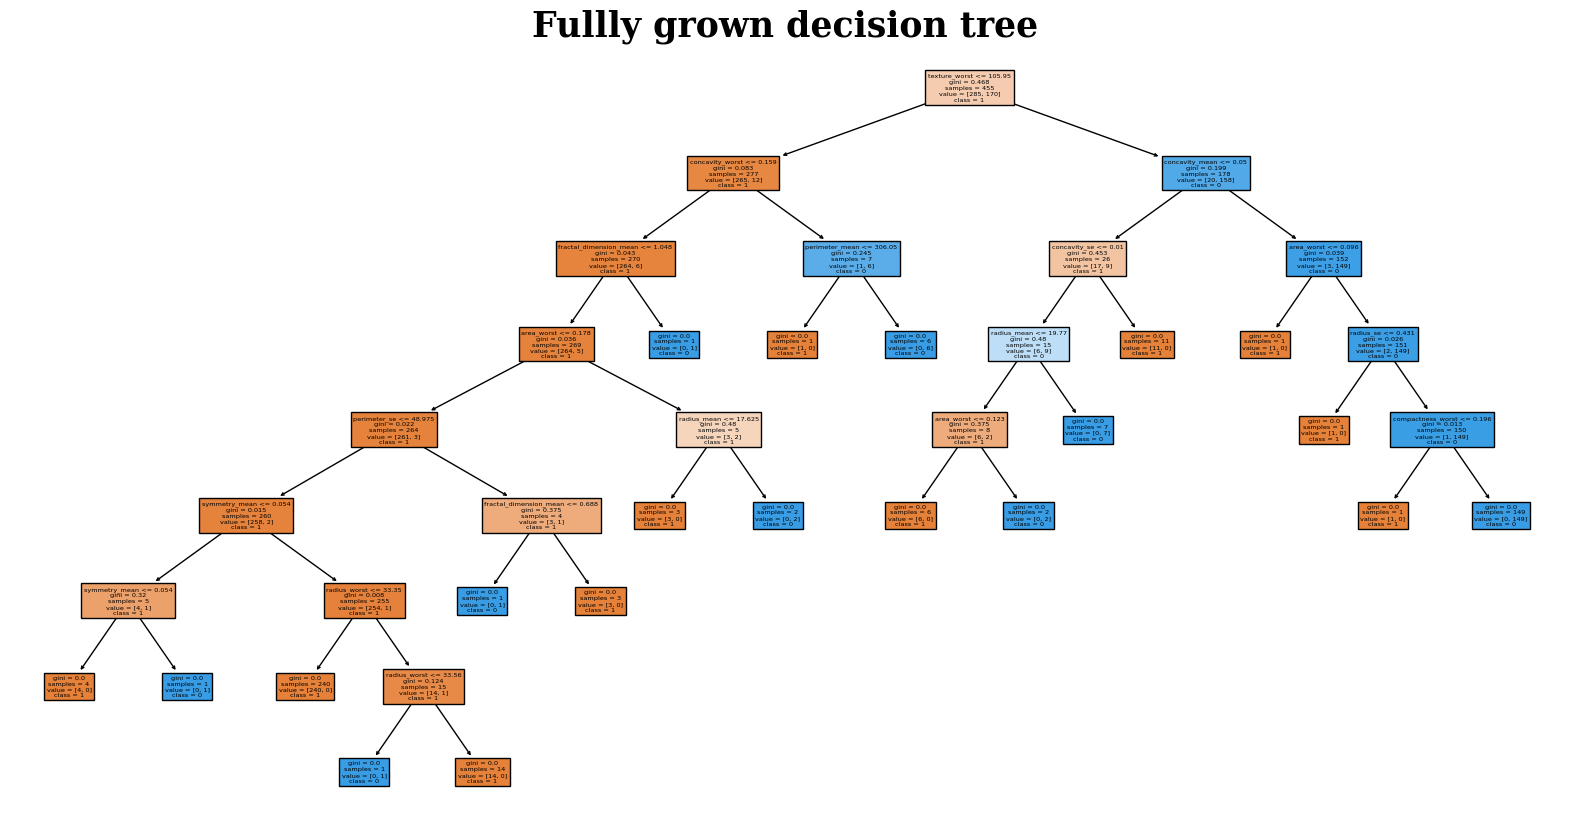

In [101]:
feature_names = df.columns.tolist()
target_names = df['diagnosis'].unique().tolist()
target_names = [str(class_name) for class_name in target_names]

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(FullTree, filled=True, feature_names=feature_names, class_names=target_names, ax=ax)
plt.title('Fullly grown decision tree', fontdict={'fontsize': 25, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.show()

In [102]:
# set the hyperparameters for pre-pruning
param_grid = {'max_depth': [3, 5, 6, None],
              'min_samples_split': [3, 5, 10, None],
              'min_samples_leaf': [10, 15, 20, None],
              'max_leaf_nodes': [5, 6, 7, None]}


FullTree_pre = copy.deepcopy(FullTree)

# perform grid search to find the best hyperparameters based on AUROC for validation data
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(FullTree_pre, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters for pre-pruning:", best_params)

# create a new DecisionTreeClassifier object with the best hyperparameters
FullTree_pre = DecisionTreeClassifier(**best_params)

# train the decision tree on the learning data
FullTree_pre.fit(X_train, y_train)

# Evaluate the decision tree on the verification data
y_val_pred = FullTree_pre.predict(X_val)
auroc = roc_auc_score(y_val, y_val_pred)
print("AUROC on validation data:", auroc)

# extract hyperparameters and results
results = pd.DataFrame.from_dict(grid_search.cv_results_)
cols_to_keep = ['params', 'mean_test_score']
results = results[cols_to_keep]
results['params'] = results['params'].apply(lambda x: str(x).replace('{', '').replace('}', ''))
results['mean_test_score'] = results['mean_test_score'].round(3)

# print results in a table format
#print('\nResults:')
#print(results.to_string(index=False))

Best hyperparameters for pre-pruning: {'max_depth': 6, 'max_leaf_nodes': 7, 'min_samples_leaf': 10, 'min_samples_split': 10}
AUROC on validation data: 0.8869047619047619


In [103]:
results

,params,mean_test_score
0,"'max_depth': 3, 'max_leaf_nodes': 5, 'min_samp...",0.959
1,"'max_depth': 3, 'max_leaf_nodes': 5, 'min_samp...",0.959
2,"'max_depth': 3, 'max_leaf_nodes': 5, 'min_samp...",0.959
3,"'max_depth': 3, 'max_leaf_nodes': 5, 'min_samp...",NaN
4,"'max_depth': 3, 'max_leaf_nodes': 5, 'min_samp...",0.967
...,...,...
251,"'max_depth': None, 'max_leaf_nodes': None, 'mi...",NaN
252,"'max_depth': None, 'max_leaf_nodes': None, 'mi...",NaN
253,"'max_depth': None, 'max_leaf_nodes': None, 'mi...",NaN
254,"'max_depth': None, 'max_leaf_nodes': None, 'mi...",NaN


Maximum AUROC: 0.978
Minimum AUROC: 0.958
Average AUROC: 0.9696458333333333


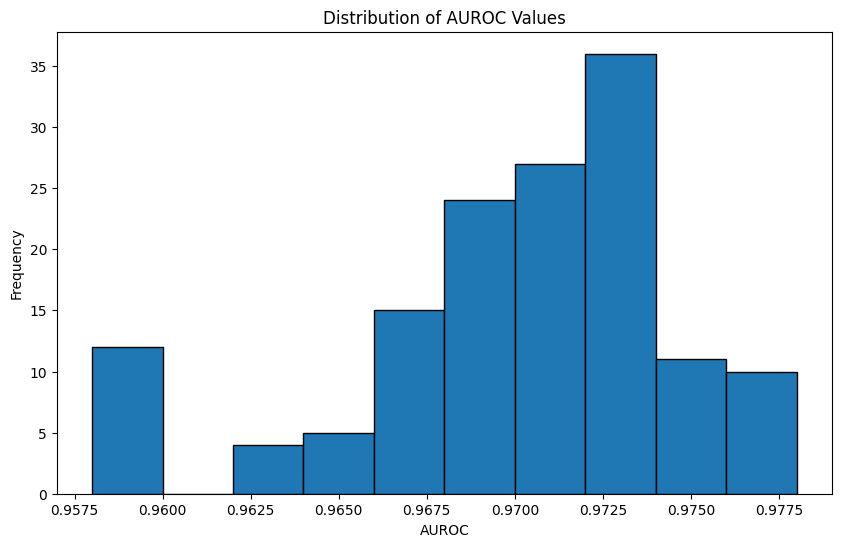

In [104]:
# Calculate maximum, minimum, and average AUROC values
max_auroc = results['mean_test_score'].max()
min_auroc = results['mean_test_score'].min()
avg_auroc = results['mean_test_score'].mean()

print("Maximum AUROC:", max_auroc)
print("Minimum AUROC:", min_auroc)
print("Average AUROC:", avg_auroc)

# Plot the distribution of AUROC values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(results['mean_test_score'], bins=10, edgecolor='black')
plt.xlabel('AUROC')
plt.ylabel('Frequency')
plt.title('Distribution of AUROC Values')
plt.show()

In [105]:
param_grid = {'max_depth': [3], 'max_leaf_nodes': [7], 'min_samples_leaf': [20], 'min_samples_split': [5]}

# create a new DecisionTreeClassifier object with the hyperparameters from param_grid
FullTree_pre = DecisionTreeClassifier(max_depth=3,
                                      max_leaf_nodes=7,
                                      min_samples_leaf=20,
                                      min_samples_split=5)

# train the decision tree on the learning data
# Train the final model on the combined training and validation data
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

FullTree_pre.fit(X_train_val, y_train_val)

# Evaluate the decision tree on the test data
y_test_pred = FullTree_pre.predict(X_test)
auroc = roc_auc_score(y_test, y_test_pred)
print("AUROC on test data:", auroc)

AUROC on test data: 0.8492063492063492


In [106]:
y_test_pred = FullTree_pre.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

Test Data:
Accuracy: 0.86
BCR (Balanced Accuracy): 0.849
AUROC: 0.849
F1 Score: 0.81
Precision: 0.81
Recall (Sensitivity): 0.81
TPR (Sensitivity): 0.81
TNR (Specificity): 0.889


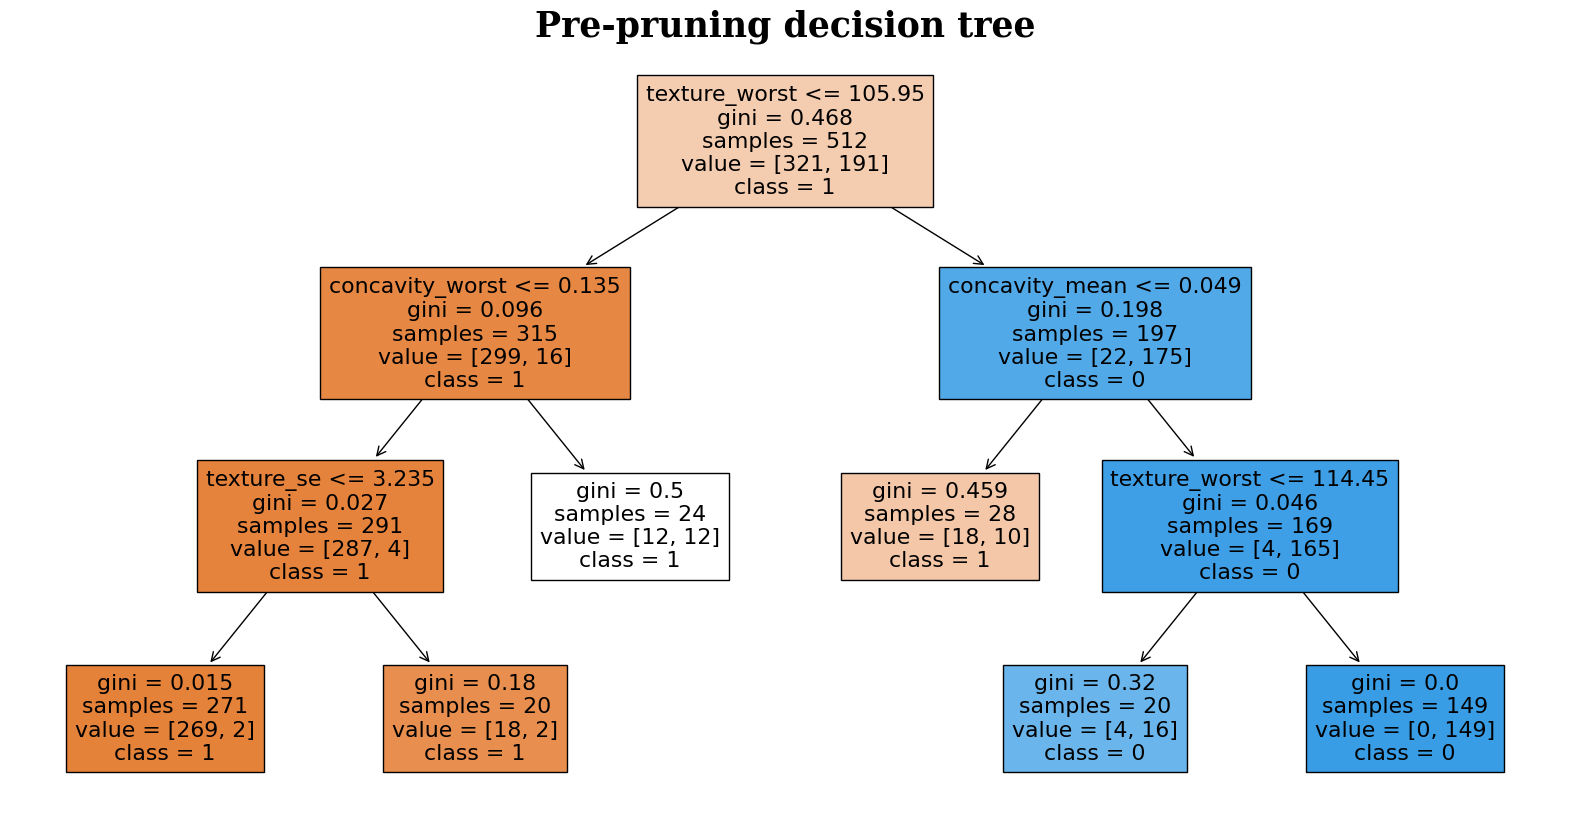

In [107]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(FullTree_pre, filled=True, feature_names=feature_names, class_names=target_names, ax=ax)
plt.title('Pre-pruning decision tree', fontdict={'fontsize': 25, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.show()

In [108]:
#Neural Network: k-fold로 hidden node 범위 조정

In [111]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

# Candidate hidden nodes
hidden = np.arange(5, 101, 5)

# 5-fold cross validation index
kf = KFold(n_splits=5)
val_perf = pd.DataFrame(columns=['hidden', 'ACC', 'BCR', 'AUROC'])

for hidden_nodes in hidden:
    print(f"Training ANN: the number of hidden nodes: {hidden_nodes}")
    eval_fold = []

    for train_index, val_index in kf.split(X_train):
        # Training with the data in (k-1) folds
        tmp_trn_input = X_train.iloc[train_index]
        tmp_trn_target = y_train.iloc[train_index]
        tmp_net = MLPClassifier(hidden_layer_sizes=(hidden_nodes,), max_iter=400, verbose=True)
        tmp_net.fit(tmp_trn_input, tmp_trn_target)

        # Evaluate the model with the remaining 1 fold
        tmp_val_input = X_train.iloc[val_index]
        tmp_val_target = y_train.iloc[val_index]

        eval_fold.append(confusion_matrix(tmp_val_target, tmp_net.predict(tmp_val_input)))

    # Confusion matrix
    cm = np.mean(eval_fold, axis=0).astype(float)

    # Simple Accuracy
    ACC = np.trace(cm) / np.sum(cm)

    # Balanced Correction Rate
    BCR = np.power(np.prod(np.diag(cm) / np.sum(cm, axis=1)), 1 / cm.shape[0])

    eval_labels = np.concatenate([y_train.iloc[val_index] for _, val_index in kf.split(X_train)])
    eval_probs = np.concatenate([tmp_net.predict_proba(X_train.iloc[val_index])[:, 1] for _, val_index in kf.split(X_train)])
    AUROC = roc_auc_score(eval_labels, eval_probs)

    # Append the values to the DataFrame
    val_perf = pd.concat([val_perf, pd.DataFrame({'hidden': [hidden_nodes], 'ACC': [ACC], 'BCR': [BCR], 'AUROC': [AUROC]})], ignore_index=True)

# Sort based on AUROC in descending order
ordered_kfold = val_perf.sort_values(by='AUROC', ascending=False)

# Display the sorted DataFrame
print(ordered_kfold)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Iteration 170, loss = 0.11141067
Iteration 171, loss = 0.11110602
Iteration 172, loss = 0.11496441
Iteration 173, loss = 0.11222298
Iteration 174, loss = 0.11943144
Iteration 175, loss = 0.11034313
Iteration 176, loss = 0.11943149
Iteration 177, loss = 0.11144565
Iteration 178, loss = 0.10838256
Iteration 179, loss = 0.11039767
Iteration 180, loss = 0.11100633
Iteration 181, loss = 0.12280510
Iteration 182, loss = 0.11442484
Iteration 183, loss = 0.11086128
Iteration 184, loss = 0.11656256
Iteration 185, loss = 0.11611201
Iteration 186, loss = 0.10753258
Iteration 187, loss = 0.11296579
Iteration 188, loss = 0.10849075
Iteration 189, loss = 0.11022585
Iteration 190, loss = 0.10891341
Iteration 191, loss = 0.10396670
Iteration 192, loss = 0.11378716
Iteration 193, loss = 0.10582101
Iteration 194, loss = 0.10465015
Iteration 195, loss = 0.10499539
Iteration 196, loss = 0.10529309
Iteration 197, loss = 0.10584760
Iteration 198, loss = 0.10321653
Iterati

In [112]:
ordered_kfold

,hidden,ACC,BCR,AUROC
15,80,0.938462,0.930195,0.993953
18,95,0.938462,0.931526,0.993953
9,50,0.951648,0.940325,0.993251
3,20,0.685714,0.706961,0.992074
16,85,0.938462,0.921703,0.991765
14,75,0.945055,0.932489,0.991662
13,70,0.945055,0.935274,0.991352
12,65,0.808791,0.823983,0.991207
11,60,0.931868,0.923760,0.990857
19,100,0.938462,0.921703,0.990237


In [113]:
##Grid Search로 하이퍼파라미터 조합 탐색

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [116]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from itertools import product

# Define the hyperparameters to search
learning_rates = [0.01, 0.05, 0.1]
activation_functions = ['sigmoid', 'relu', 'tanh']
num_hidden_layers = [1, 2, 3]
num_hidden_nodes = [50, 60, 70, 80]

# Create a DataFrame to store hyperparameters and AUROC scores
results = pd.DataFrame(columns=['Learning Rate', 'Activation Function', 'Hidden Layers', 'Hidden Nodes', 'AUROC'])

# Perform grid search
for lr, activation, num_layers, num_nodes in product(learning_rates, activation_functions, num_hidden_layers, num_hidden_nodes):
    # Create and train the neural network
    model = Sequential()
    model.add(Dense(num_nodes, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(num_layers - 1):
        model.add(Dense(num_nodes, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # output layer with sigmoid activation for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam')
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict probabilities on the verification set
    y_val_pred = model.predict(X_val)

    # Calculate AUROC
    auroc = roc_auc_score(y_val, y_val_pred)

    # Store the results
    result = pd.DataFrame({
        'Learning Rate': [lr],
        'Activation Function': [activation],
        'Hidden Layers': [num_layers],
        'Hidden Nodes': [num_nodes],
        'AUROC': [auroc]
    })
    results = pd.concat([results, result], ignore_index=True)

# Find the optimal hyperparameter combination based on AUROC
optimal_hyperparameters = results.loc[results['AUROC'].idxmax()]

# Print the optimal hyperparameters and AUROC
print("Optimal Hyperparameters:")
print(optimal_hyperparameters)

# Print all hyperparameter combinations and AUROC scores
print("All Hyperparameter Combinations and AUROC:")
print(results)


2/2 [==============================] - 0s 7ms/step


2/2 [==============================] - 0s 6ms/step


2/2 [==============================] - 0s 4ms/step
Optimal Hyperparameters:
Learning Rate              0.01
Activation Function        tanh
Hidden Layers                 2
Hidden Nodes                 60
AUROC                  0.984127
Name: 29, dtype: object
All Hyperparameter Combinations and AUROC:
     Learning Rate Activation Function Hidden Layers Hidden Nodes     AUROC
0             0.01             sigmoid             1           50  0.924603
1             0.01             sigmoid             1           60  0.965608
2             0.01             sigmoid             1           70  0.945767
3             0.01             sigmoid             1           80  0.931217
4             0.01             sigmoid             2           50  0.945767
..             ...                 ...           ...          ...       ...
103           0.10                tanh             2           80  0.974868
104           0.10                tanh             3           50  0.917989
105          

In [117]:
# Use the optimal hyperparameters to create and train the final model
optimal_lr = optimal_hyperparameters['Learning Rate']
optimal_activation = optimal_hyperparameters['Activation Function']
optimal_num_layers = int(optimal_hyperparameters['Hidden Layers'])
optimal_num_nodes = int(optimal_hyperparameters['Hidden Nodes'])

final_model = Sequential()
final_model.add(Dense(optimal_num_nodes, activation=optimal_activation, input_shape=(X_train.shape[1],)))
for _ in range(optimal_num_layers - 1):
    final_model.add(Dense(optimal_num_nodes, activation=optimal_activation))
final_model.add(Dense(1, activation='sigmoid'))
final_model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the final model on the combined training and validation data
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)
final_model.fit(X_train_val, y_train_val, epochs=10, batch_size=32, verbose=0)

# Predict probabilities on the test set
y_test_pred = final_model.predict(X_test)

# Calculate AUROC on the test set
test_auroc = roc_auc_score(y_test, y_test_pred)

# Print the AUROC on the test set
print("AUROC on Test Set:", test_auroc)

2/2 [==============================] - 0s 4ms/step
AUROC on Test Set: 0.9457671957671957


In [118]:
# Convert predicted probabilities to binary predictions
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred_binary).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred_binary)
recall_test = recall_score(y_test, y_test_pred_binary)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

Test Data:
Accuracy: 0.86
BCR (Balanced Accuracy): 0.849
AUROC: 0.946
F1 Score: 0.81
Precision: 0.81
Recall (Sensitivity): 0.81
TPR (Sensitivity): 0.81
TNR (Specificity): 0.889


Maximum AUROC: 0.9841269841269841
Minimum AUROC: 0.7883597883597883
Average AUROC: 0.9485229276895943


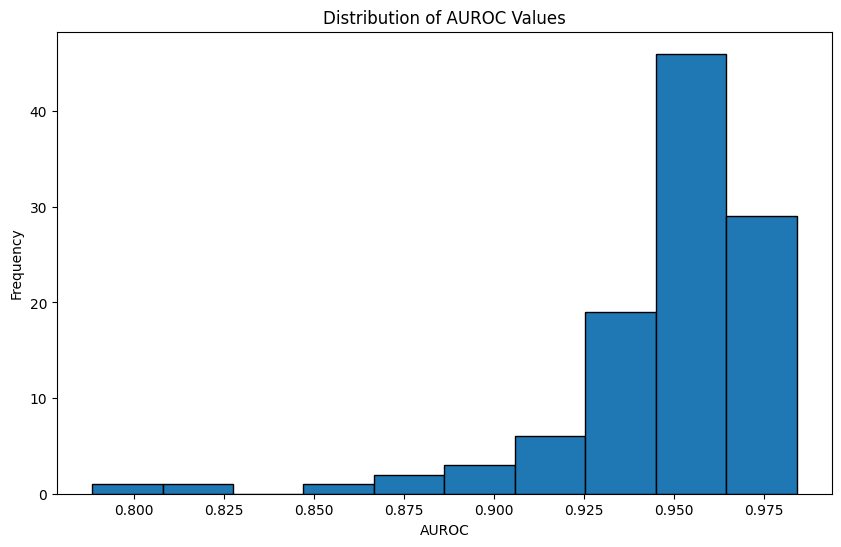

In [120]:
# Calculate maximum, minimum, and average AUROC values
max_auroc = results['AUROC'].max()
min_auroc = results['AUROC'].min()
avg_auroc = results['AUROC'].mean()

print("Maximum AUROC:", max_auroc)
print("Minimum AUROC:", min_auroc)
print("Average AUROC:", avg_auroc)

# Plot the distribution of AUROC values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(results['AUROC'], bins=10, edgecolor='black')
plt.xlabel('AUROC')
plt.ylabel('Frequency')
plt.title('Distribution of AUROC Values')
plt.show()

In [121]:
#Q10.

In [122]:
##Logistic Regression

In [123]:
# Train the final model on the combined training and validation data
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Create the logistic regression model
Logistic_model = LogisticRegression()

# Train the model on the training data
Logistic_model.fit(X_train_val, y_train_val)

LogisticRegression()

In [124]:
y_test_pred = Logistic_model.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

Test Data:
Accuracy: 0.93
BCR (Balanced Accuracy): 0.915
AUROC: 0.915
F1 Score: 0.9
Precision: 0.947
Recall (Sensitivity): 0.857
TPR (Sensitivity): 0.857
TNR (Specificity): 0.972
